In [149]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

states = geopandas.read_file('data/usa-states-census-2014.shp')
states = states.to_crs("EPSG:3395")

<Axes: >

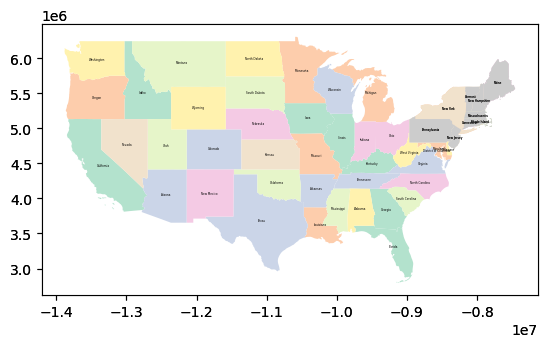

In [150]:
states.plot()
fig = plt.figure(1, figsize=(10,10)) 
ax = fig.add_subplot()
states.apply(lambda x: ax.annotate(x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=2), axis=1)
states.plot(ax=ax, cmap='Pastel2', figsize=(10, 10))

In [170]:
dataset = geopandas.read_file('zip://cb_2020_us_cousub_500k.zip')
tornados = geopandas.read_file('zip://data/1950-2018-torn-initpoint.zip!1950-2018-torn-initpoint')

dataset = dataset.to_crs("EPSG:3395")
tornados = tornados.to_crs("EPSG:3395")

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.0,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,POINT (-1e+07 4.66e+06)
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,5.0,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,POINT (-9.94e+06 4.71e+06)
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,4.0,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,POINT (-9.42e+06 4.97e+06)
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,3.0,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,POINT (-1.05e+07 4.06e+06)
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,5.0,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,POINT (-1.01e+07 4.5e+06)


In [130]:
contiguous_states = [
    'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN',
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
    'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
    'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

dataset = dataset[dataset['STUSPS'].isin(contiguous_states)]
tornados = tornados[tornados['st'].isin(contiguous_states)]

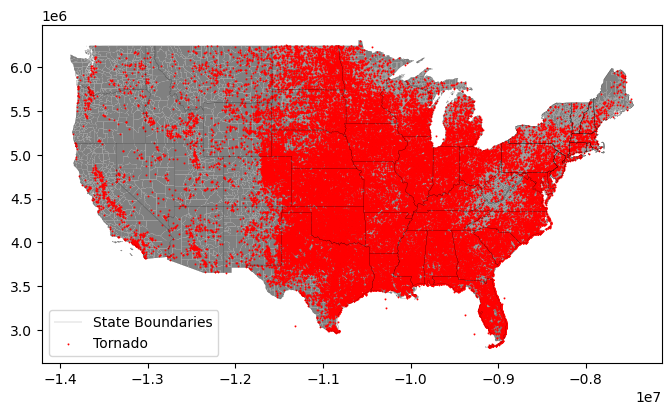

In [132]:
west = states[states['region'] == 'West']
northeast = states[states['region'] == 'Northeast']
northwest = states[states['region'] == 'Northwest']

contiguous_states = pd.concat([west, northeast, northwest])

fig = plt.figure(1, figsize=(8,6)) 
ax = fig.add_subplot()

states.boundary.plot(ax=ax, color='black', linewidth=.1, label='State Boundaries')
dataset.plot(ax=ax, color='grey')
tornados.plot(ax=ax, color='red', marker='v', markersize=0.2, label="Tornado")
ax.legend()

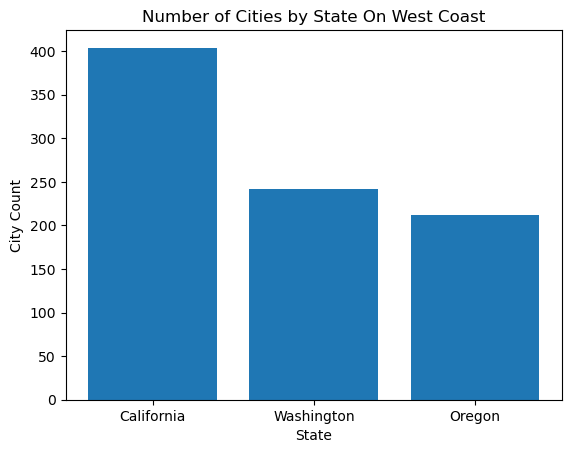

In [124]:
statefp_map = {'06': 'California', '41': 'Oregon', '53': 'Washington'}
subset = dataset[dataset['STATEFP'].isin(statefp_map.keys())]
counts = subset['STATEFP'].value_counts().rename(index=statefp_map)

plt.bar(counts.index, counts.values)
plt.title('Number of Cities by State On West Coast')
plt.ylabel('City Count')
plt.xlabel('State')
plt.show()

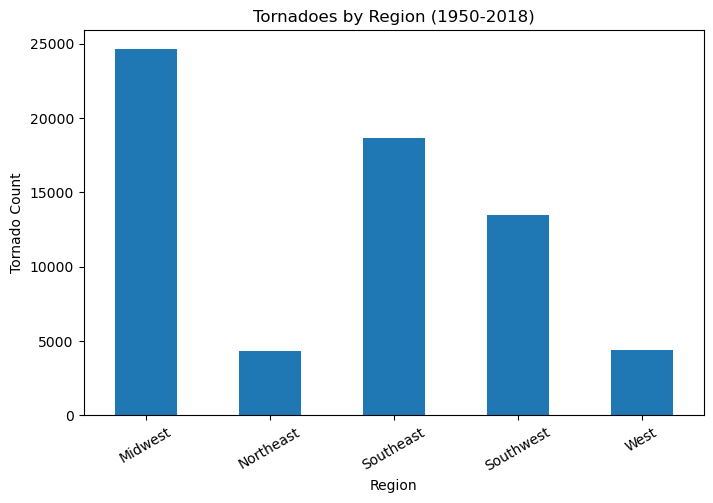

In [169]:
twisters_by_state = tornados.copy()
twisters_by_state['tornados'] = 1

twisters_by_state = twisters_by_state.merge(states[['STUSPS', 'region']], how='left', left_on='st', right_on='STUSPS')

twisters_by_region = twisters_by_state.groupby('region')['tornados'].sum()

twisters_by_region.plot.bar(figsize=(8,5), title='Tornadoes by Region (1950-2018)')
plt.ylabel('Tornado Count')
plt.xlabel('Region')
plt.xticks(rotation=30)
plt.show()

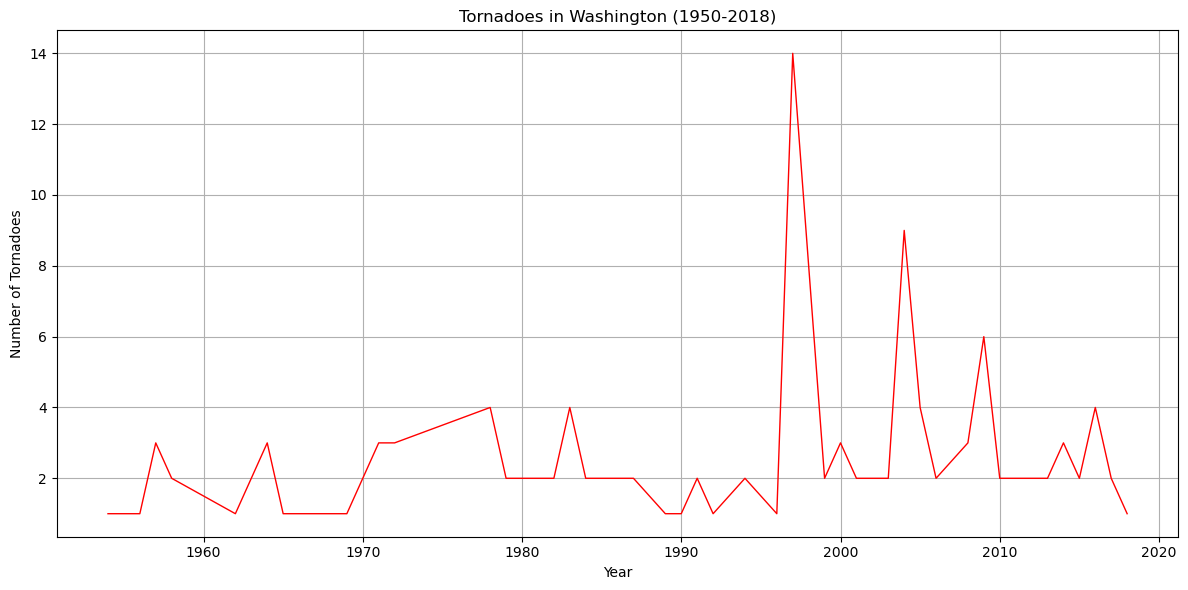

In [179]:
washington_tornados = tornados[tornados['st'] == 'WA']
tornados_by_year = washington_tornados.groupby('yr').size()

plt.figure(figsize=(12, 6))
plt.plot(tornados_by_year.index, tornados_by_year.values, color='red', linewidth=1)

# Add labels and title
plt.title('Tornadoes in Washington (1950-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()